In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
X = pd.read_csv("./linearX.csv").values
y = pd.read_csv("./linearY.csv").values

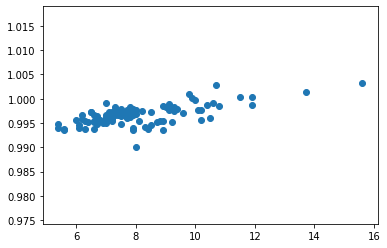

In [13]:
plt.scatter(X, y)
plt.show()

In [16]:
np.mean(X)

8.05151515151515

In [17]:
np.std(X)

1.728627857571563

In [20]:
X_norm = (X - X.mean()) / X.std()

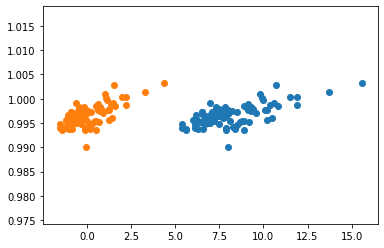

In [25]:
plt.scatter(X, y)
plt.scatter(X_norm, y)
plt.show()

## Linear Regression

In [78]:
def hypothesis(x, theta):
    return theta[0] + theta[1]*x

In [79]:
hypothesis(7, np.array([1.5,2]))

15.5

In [80]:
def error(X, y, theta):
    m = X.shape[0]
    total_err = 0
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_err += (y_ - y[i])**2
        
    return float(total_err / m)

In [81]:
error(X, y, np.array([0, 0.2]))

0.4951809352525252

In [82]:
def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros(2)
    
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        grad[0] += (y_ - y[i])
        grad[1] += (y_ - y[i])*X[i]
        
    return grad/m

In [83]:
gradient(X, y, np.array([0, 0,2]))

array([-0.99663414, -8.02676226])

In [93]:
def gradient_descent(X, y, lr=0.1, max_itr=100):
    m = X.shape[0]
    
    theta = np.zeros(2)
    
    losses = []
    
    for i in range(max_itr):
        
        e = error(X, y, theta)
        losses.append(e)
        
        grad = gradient(X, y, theta)
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta, losses

In [94]:
Theta, Losses  = gradient_descent(X_norm, y)

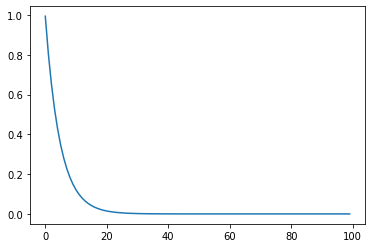

In [95]:
plt.plot(Losses)
plt.show()

In [99]:
Theta

array([0.99660767, 0.0013579 ])

## Test Dataset

In [103]:
x_test = np.array([-1, 0, 1, 2, 3, 4, 5])

In [104]:
y_pred = hypothesis(x_test, Theta)

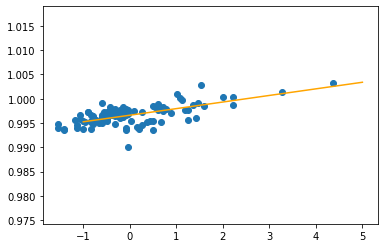

In [106]:
plt.scatter(X_norm, y)
plt.plot(x_test, y_pred, color="orange")
plt.show()